- Q1). What are overall sales trend?
- Q2). What are top 10 products by sales?
- Q3). What are the most selling products?
- Q4). What is the most preferred ship mode?
- Q5). Which are the most profitable categories and sub-categories?
- Q6). Which are the top 1 profitable sub-categories whithin a categories? 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

## DATA AUDIT

In [3]:
df.shape  #(51290, 21)
df.index  #RangeIndex(start=0, stop=51290, step=1)
df.columns
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [4]:
df.head()
df.tail()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

## DATA ANALYSIS

## Q1). What Is the overall sales trend?

In [7]:
df['month_year'] = df['order_date'].apply(lambda x:x.strftime('%Y-%m'))

In [8]:
df_trend = df.groupby('month_year')['sales'].sum().reset_index()

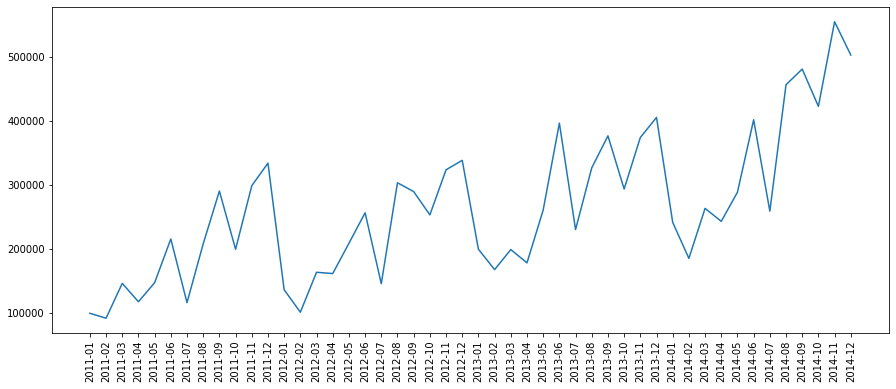

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['sales'],)
plt.xticks(rotation='vertical')
plt.show()

## Q2). What are top 10 products by sales?

In [10]:
dfp=df.groupby('product_name').agg({'sales':'sum'}).nlargest(10,columns='sales')

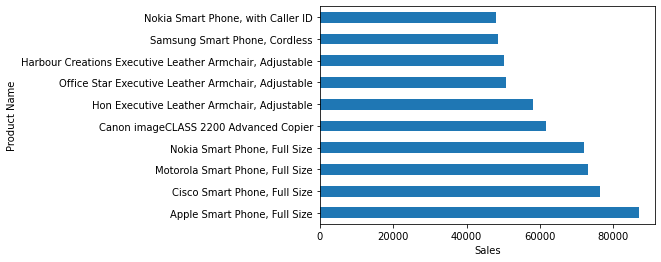

In [18]:
dfp['sales'].plot.barh()
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

## Q3). What are the most selling products?

In [20]:
dfp=df.groupby('product_name').agg({'quantity':'sum'}).nlargest(5, columns='quantity')

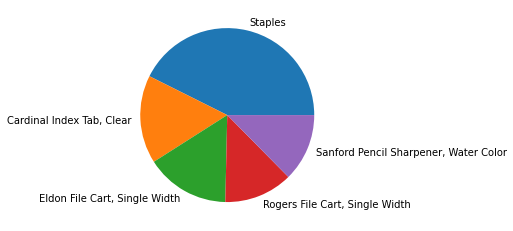

In [27]:
dfp['quantity'].plot.pie()
plt.ylabel('')
plt.show()

## Q4). What is the most preferred ship mode?

c:\users\narender\desktop\python\environments\lpandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

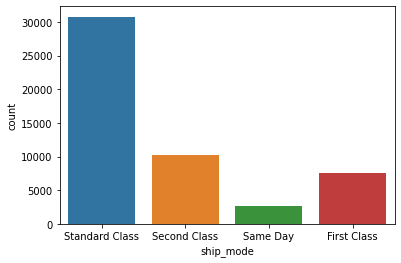

In [63]:
sns.countplot(df['ship_mode'])

In [38]:
dfp=df['ship_mode'].value_counts().reset_index()
dfp

,index,ship_mode
0,Standard Class,30775
1,Second Class,10309
2,First Class,7505
3,Same Day,2701


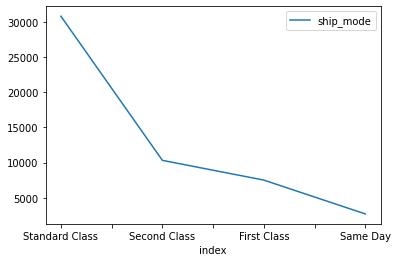

In [42]:
#plt.bar( dfp['index'], dfp['ship_mode'])
dfp.plot.line(x='index',y='ship_mode')
plt.show()

## Q5). Which are the most profitable categories and sub-categories?

In [43]:
df.groupby(['category', 'sub_category']).agg({'profit':'sum'}).sort_values(by='profit', ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Office Supplies Appliances    141680.58940
Technology      Accessories   129626.30620
Office Supplies Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
Technology      Machines       58867.87300
Office Supplies Art            57953.91090
Furniture       Furnishings    46967.42550
Office Supplies Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Tables        -64083.38870

### Q6). Which are the top 1 profitable sub-categories whithin a categories? 

In [44]:
df1=df.groupby(['category', 'sub_category']).agg({'profit':'sum'}).reset_index()

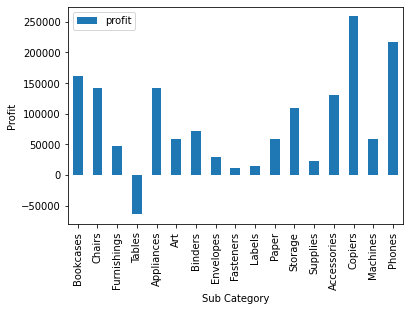

In [52]:
df1.plot.bar(x='sub_category', y='profit')
plt.xlabel('Sub Category')
plt.ylabel('Profit')
plt.show()

In [170]:
df1.set_index('sub_category', inplace=True)

In [172]:
df1.groupby(['category'])['profit'].nlargest(1)

category         sub_category
Furniture        Bookcases       161924.41950
Office Supplies  Appliances      141680.58940
Technology       Copiers         258567.54818
Name: profit, dtype: float64

## Q7). Compare product categories over the years

In [176]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month', 'month_year'],
      dtype='object')

In [54]:
df2=df.groupby(['year','category']).agg({'sales':'sum'}).reset_index()

In [55]:
df3=pd.pivot_table(df2,index=['year'],columns=['category'], values='sales', aggfunc=np.sum).reset_index()
df3

category,year,Furniture,Office Supplies,Technology
0,2011,7.561924e+05,6.756065e+05,8.276521e+05
1,2012,8.589026e+05,7.950946e+05,1.023442e+06
2,2013,1.117724e+06,1.010718e+06,1.277305e+06
3,2014,1.378056e+06,1.305652e+06,1.616159e+06


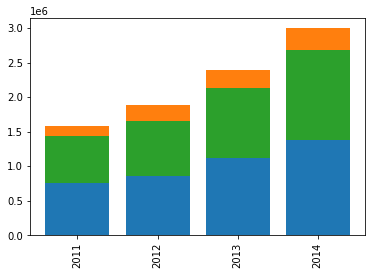

In [240]:
plt.bar(df3['year'],df3['Technology'])
plt.bar(df3['year'],df3['Furniture'],bottom=df3['Technology'])
plt.bar(df3['year'],df3['Office Supplies'],bottom=df3['Furniture'])
plt.xticks(df3['year'],rotation='vertical')

plt.show()

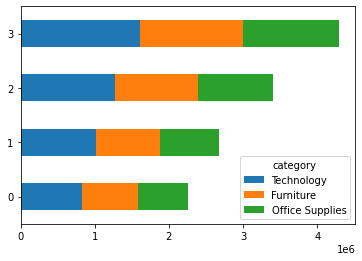

In [74]:
df3[['Technology','Furniture','Office Supplies']].plot.barh(stacked=True)
plt.show()